## TSFs Task 3 by Naman Jain

### Exploratory Data Analysis - Retail
##### We are going to find out the weak areas in the business and we will find out the key areas where we can get the maximum profits.

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (6, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
df = pd.read_csv('SampleSuperstore.csv')
print('Data Read and Imported Successfully')

Data Read and Imported Successfully


In [4]:
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [5]:
df.shape

(9994, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


#### Now we will delete some columns which are not necessary i.e. Postal Code because we already have the City names.

In [7]:
df.drop(columns=['Postal Code'], inplace=True)

#### Scanning for null values

In [8]:
df.isna()
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#### Describing the Data

In [9]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


### Comparing Profit and Sales of Different Categories

In [10]:
mean_category= df.groupby('Category').mean('Sales')
mean_category[['Profit','Sales']]

,Profit,Sales
Category,,
Furniture,8.699327,349.834887
Office Supplies,20.327050,119.324101
Technology,78.752002,452.709276


Text(0.5, 1.0, 'Average Sales and Profit in Category')

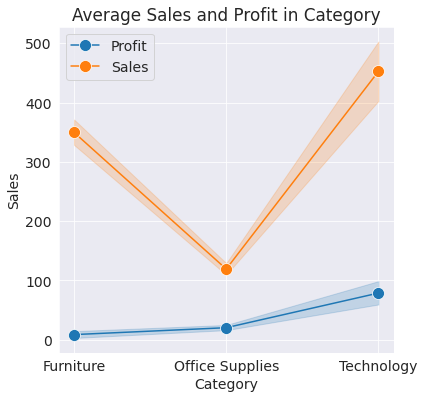

In [11]:
sns.lineplot(data=df,x='Category',y='Profit',marker='o',markersize=12);
sns.lineplot(data=df,x='Category',y='Sales',marker='o',markersize=12);
plt.legend(['Profit','Sales'])
plt.title('Average Sales and Profit in Category')

### Comparing Profit and Sales of Different Shipping Mode

<AxesSubplot:title={'center':'Avregae Sales'}, xlabel='Category', ylabel='Sales'>

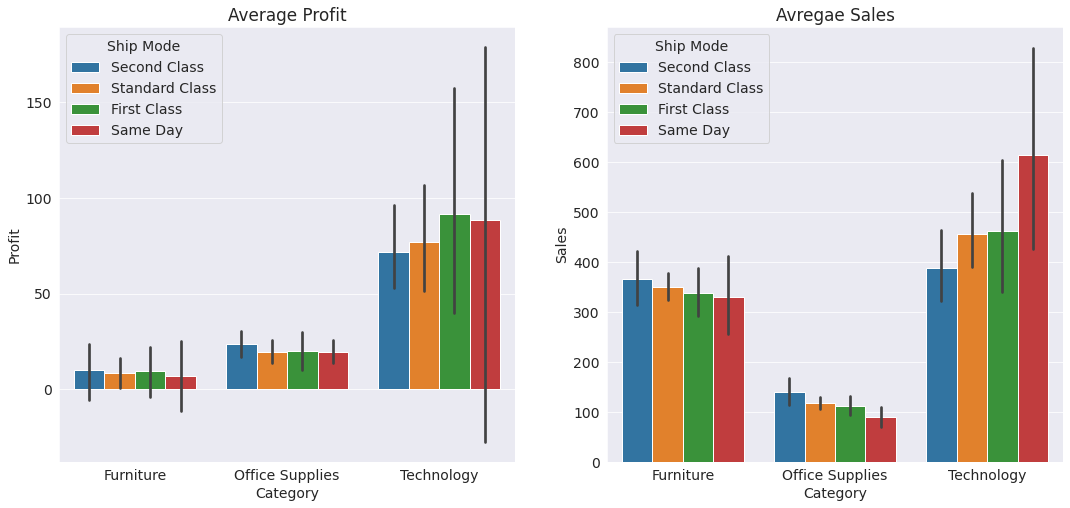

In [12]:
fig, axes = plt.subplots(1,2, figsize=(18,8))
axes[0].set_title('Average Profit')
sns.barplot(x='Category',y='Profit',hue='Ship Mode',data=df, ax=axes[0])

axes[1].set_title('Avregae Sales')
sns.barplot(x='Category',y='Sales',hue='Ship Mode',data=df,ax=axes[1])

In [13]:
ship_mode=df.groupby(['Ship Mode'])[['Sales','Profit']].mean()
ship_mode

,Sales,Profit
Ship Mode,,
First Class,228.497024,31.839948
Same Day,236.396179,29.266591
Second Class,236.089239,29.535545
Standard Class,227.583067,27.494770


array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Profit'>],
      dtype=object)

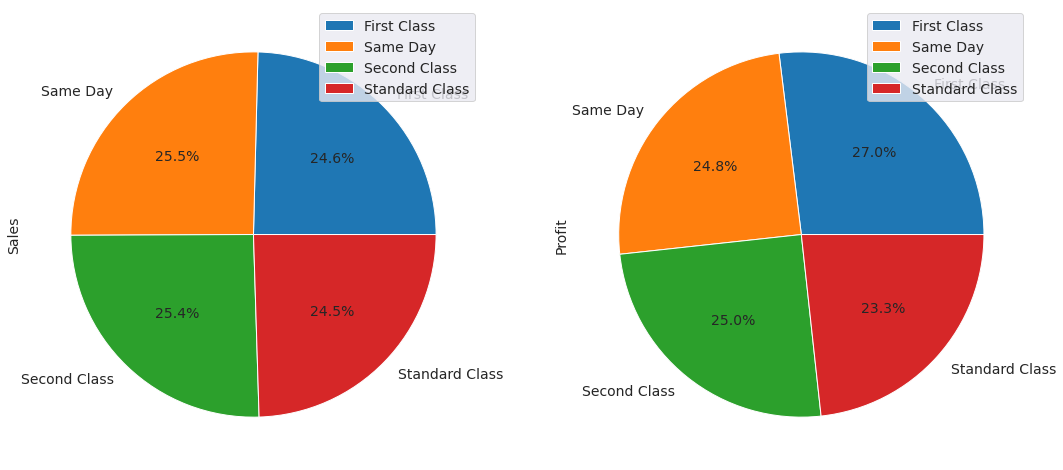

In [14]:
ship_mode.plot.pie(subplots=True, figsize=(18,20), autopct='%1.1f%%', labels= ship_mode.index)

##### 1.Profits and Discounts are high in First Class
##### 2.Sales are high in Same Day Ship

### Comparing Profit and Sales of Different Segments

<AxesSubplot:title={'center':'Avergae Sale'}, xlabel='Category', ylabel='Sales'>

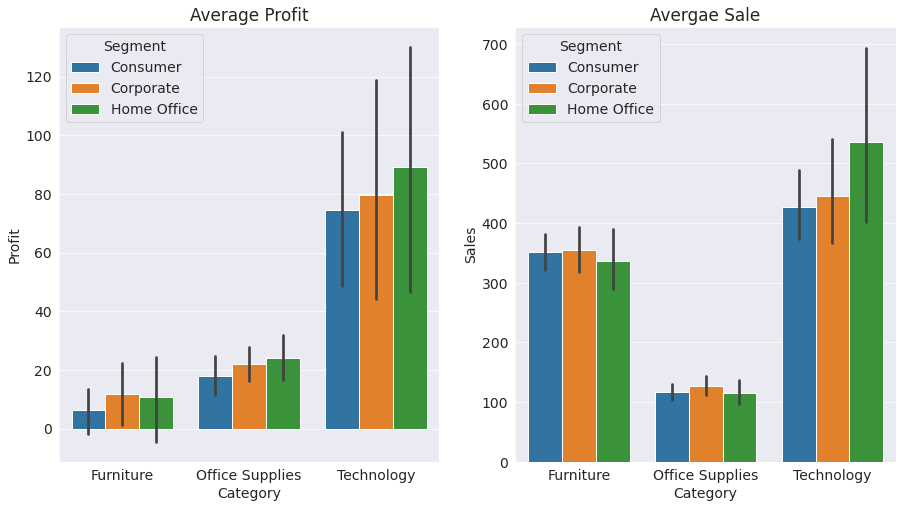

In [15]:
fig, axes= plt.subplots(1,2, figsize=(15,8))

axes[0].set_title('Average Profit')
sns.barplot(data=df,x='Category',y='Profit',hue='Segment',ax=axes[0])

axes[1].set_title('Avergae Sale')
sns.barplot(data=df,x='Category',y='Sales',hue='Segment',ax=axes[1])

In [16]:
segment=df.groupby(['Segment'])[['Sales','Profit']].mean()
segment

,Sales,Profit
Segment,,
Consumer,223.733644,25.836873
Corporate,233.823300,30.456667
Home Office,240.972041,33.818664


array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Profit'>],
      dtype=object)

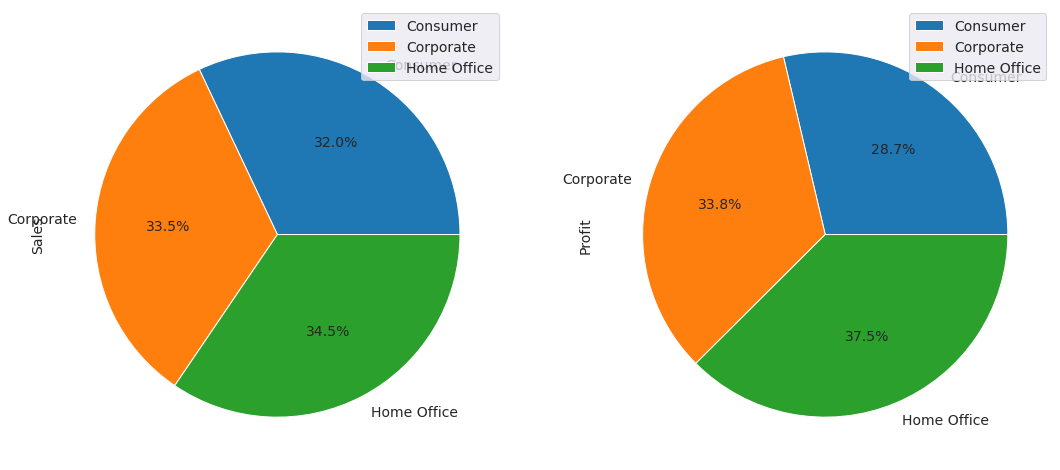

In [17]:
segment.plot.pie(subplots=True, figsize=(18,20), autopct='%1.1f%%', labels=segment.index)

### Comparing Profit and Sales of Different Sub-Category Item

In [18]:
subcategory_mean=df.groupby(['Sub-Category','Category']).mean('Sales')
subcategory_mean = subcategory_mean[['Sales','Discount','Profit']].sort_values('Profit')
subcategory_mean

,,Sales,Discount,Profit
Sub-Category,Category,,,
Tables,Furniture,648.794771,0.261285,-55.565771
Bookcases,Furniture,503.859633,0.211140,-15.230509
Supplies,Office Supplies,245.650200,0.076842,-6.258418
Fasteners,Office Supplies,13.936774,0.082028,4.375660
Art,Office Supplies,34.068834,0.074874,8.200737
Furnishings,Furniture,95.825668,0.138349,13.645918
Labels,Office Supplies,34.303055,0.068681,15.236962
Binders,Office Supplies,133.560560,0.372292,19.843574
Paper,Office Supplies,57.284092,0.074891,24.856620


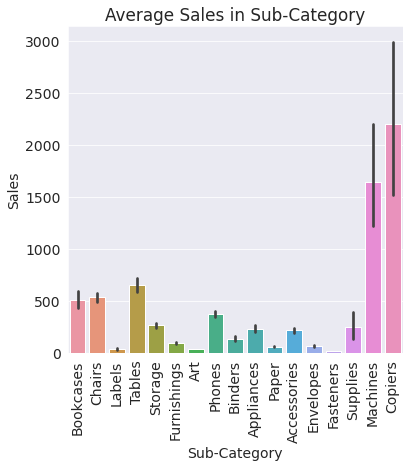

In [19]:
plt.title('Average Sales in Sub-Category')
sns.barplot(x='Sub-Category', y='Sales', data=df)
plt.xticks(rotation=90)
plt.show();

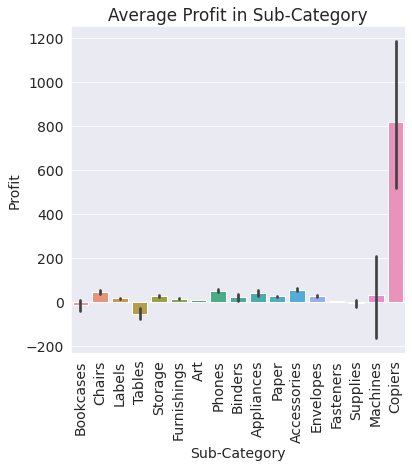

In [20]:
plt.title('Average Profit in Sub-Category')
sns.barplot(x='Sub-Category', y='Profit', data=df)
plt.xticks(rotation=90)
plt.show();

### Comparing Profit of Different States

In [23]:
mean_by_state = df.groupby(['State']).mean('Sales')

In [24]:
mean_by_state[['Sales', 'Profit']].sort_values('Profit').head(20)

,Sales,Profit
State,,
Ohio,166.861697,-36.186304
Colorado,176.418231,-35.867351
North Carolina,223.305880,-30.083985
Tennessee,167.551219,-29.189583
Pennsylvania,198.487077,-26.507598
Texas,172.779742,-26.121174
Illinois,162.939230,-25.625787
Arizona,157.508933,-15.303235
Oregon,140.573790,-9.600569


### Comparing Profit of Different Cities

In [30]:
mean_by_city=df.groupby(['City'])[['Sales','Profit']].mean().sort_values('Profit')
mean_by_city.head()

,Sales,Profit
City,,
Bethlehem,337.926800,-200.619160
Champaign,151.960000,-182.352000
Oswego,107.326000,-178.709200
Round Rock,693.436114,-169.061614
Lancaster,215.031826,-157.371052


In [31]:
mean_by_city=df.groupby(['City'])[['Sales','Profit']].mean().sort_values('Profit').tail()
mean_by_city

,Sales,Profit
City,,
Appleton,835.655000,277.383150
Minneapolis,733.501739,296.721070
Lafayette,807.619355,323.173794
Independence,1208.685000,487.831500
Jamestown,2354.395000,642.885750


## Result and Conclusion

### Profit is more than that of sale but there are some areas where profit could be increased.

#### Profit is Maximum in First Class

#### Sales is high for Same day ship

#### Sub-category: Copier: High Profit & sales

#### Category: Maximun sales and Profit obtain in Technology.

#### Category: Minimun profit obtain in Furniture

#### State: Vermont: Highest Profit

#### State: Ohio: Lowest Profit

#### Segment: Home-office: High Profit & sales

#### City: Jamestown: Highest Profit

#### City: Bethlehem: Lowest Profit